<a href="https://colab.research.google.com/github/Ehizson/AI-ML-Paths/blob/main/Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performance Visualization**

**Objective**

To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course) using some analysis and visualisation to find the relationship between different features in the dataset.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset

df = pd.read_csv('/content/StudentsPerformance.csv')

**Data Inspection**

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
#renaming the columns

df = df.rename(columns = {'race/ethnicity' : 'race_ethnicity', 'test preparation course' : 'test_prep','parental level of education' : 'parental_LOE', 'math score' : 'math_score', 'reading score' : 'reading_score', 'writing score' : 'writing_score'})
df.head()

,gender,race_ethnicity,parental_LOE,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **Data Visualization**

**Bar Chart**

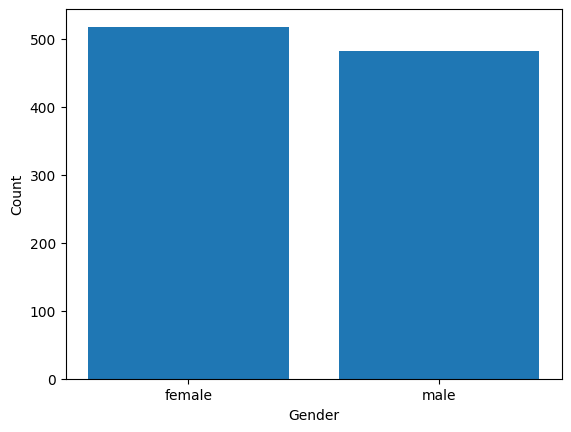

In [9]:
#get the labels for the plot
x = df['gender'].unique()

#count of the labels
y = df['gender'].value_counts(sort = False)

plt.bar(x,y)

plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

This shows that they are more female students than male students

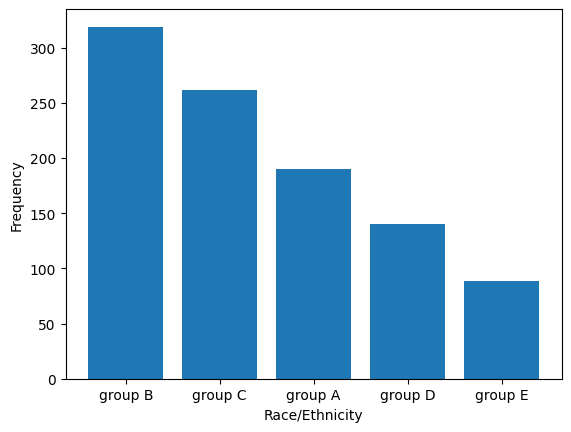

In [10]:
#plotting the students ethnicity

x = df['race_ethnicity'].unique()
y = df['race_ethnicity'].value_counts(sort = True)

plt.bar(x,y)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')

plt.show()

This shows that group B students form the majority of a common ethnicity group

In [11]:
#aggregate of scores of each gender and race

grouped = df.groupby(['gender','race_ethnicity'])
grouped.agg([np.sum,np.mean, np.std])

<ipython-input-11-bc132c901d7f>:4: FutureWarning: ['parental_LOE', 'lunch', 'test_prep'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg([np.sum,np.mean, np.std])


math_score                       reading_score  \
                             sum       mean        std           sum   
gender race_ethnicity                                                  
female group A              2107  58.527778  14.157252          2484   
       group B              6386  61.403846  16.256750          7392   
       group C             11166  62.033333  15.007224         12950   
       group D              8417  65.248062  14.174157          9552   
       group E              4886  70.811594  16.269129          5233   
male   group A              3378  63.735849  14.520742          3272   
       group B              5670  65.930233  14.156928          5405   
       group C              9398  67.611511  14.090037          9094   
       group D              9232  69.413534  13.094139          8796   
       group E              5449  76.746479  14.298570          4991   

                                            writing_score             \
                            mean        std           sum       mean   
gender race_ethnicity                                                  
female group A         69.000000  14.847799          2443  67.861111   
       group B         71.076923  14.612598          7285  70.048077   
       group C         71.944444  13.900574         12920  71.777778   
       group D         74.046512  13.914842          9678  75.023256   
       group E         75.840580  15.349481          5212  75.536232   
male   group A         61.735849  15.451103          3135  59.150943   
       group B         62.848837  14.695752          5179  60.220930   
       group C         65.424460  13.291590          8717  62.712230   
       group D         66.135338  12.765829          8700  65.413534   
       group E         70.295775  13.966689          4785  67.394366   

                                  
                             std  
gender race_ethnicity             
female group A         14.652455  
       group B         14.891439  
       group C         14.806595  
       group D         13.866814  
       group E         15.703671  
male   group A         15.137061  
       group B         14.854907  
       group C         13.647341  
       group D         13.262574  
       group E         13.449885

In [12]:
female = df.query("gender == 'female'")
female.head()

,gender,race_ethnicity,parental_LOE,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [13]:
male = df.query("gender == 'male'")
male.head()

,gender,race_ethnicity,parental_LOE,lunch,test_prep,math_score,reading_score,writing_score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52


**Pie chart**

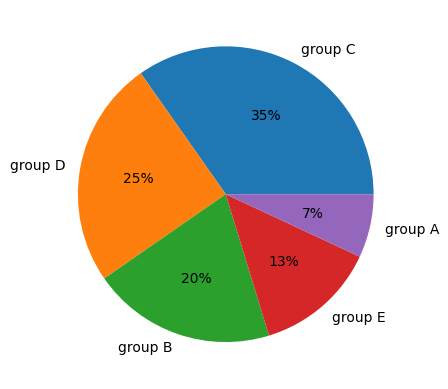

In [14]:
#Checking the race percentage for the female population

femrace = female['race_ethnicity'].value_counts()
plt.pie(femrace, labels = femrace.index, autopct = '%0.0f%%')

plt.show()

This shows there are more female students in group C than other groups

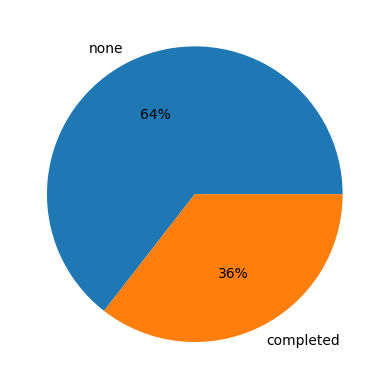

In [15]:
#check the test_prep percentage for the female

femtest = female['test_prep'].value_counts()
plt.pie(femtest, labels = femtest.index, autopct = '%0.0f%%')

plt.show()

It indicates that majority of the female students did not take the test prep course

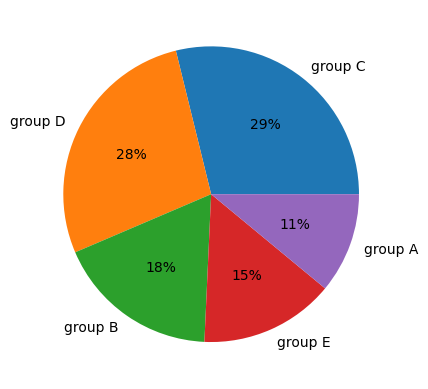

In [16]:
#Checking the race percentage for the male population

malerace = male['race_ethnicity'].value_counts()
plt.pie(malerace, labels = malerace.index, autopct = '%0.0f%%')

plt.show()

This shows there are more male students in group C than other groups

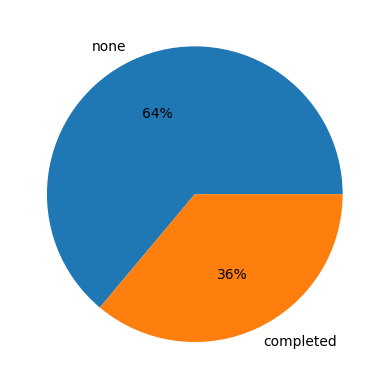

In [17]:
#check the test_prep percentage for the male

maletest = male['test_prep'].value_counts()
plt.pie(maletest, labels = maletest.index, autopct = '%0.0f%%')

plt.show()

It indicates that majority of the male students did not take the test prep course

**Scatter Chart**

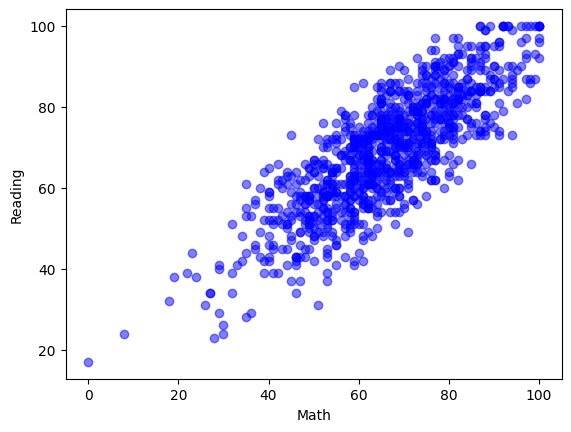

In [18]:
#correlation between math_score and reading_score

plt.scatter(df['math_score'], df['reading_score'], color = 'blue', alpha = 0.5)
plt.xlabel('Math')
plt.ylabel('Reading')

plt.show()

It correlates that the more one reads, there is a high tendency of scoring high in maths

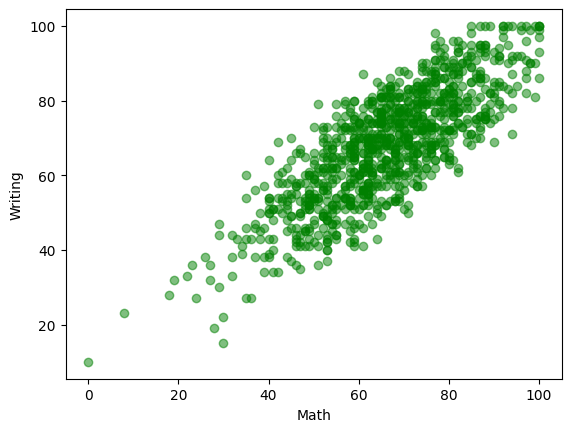

In [19]:
#correlation between math_score and writing_score

plt.scatter(df['math_score'], df['writing_score'], color = 'green', alpha = 0.5)

plt.xlabel('Math')
plt.ylabel('Writing')

plt.show()

It correlates that the more one writes, there is a high tendency of scoring high in maths

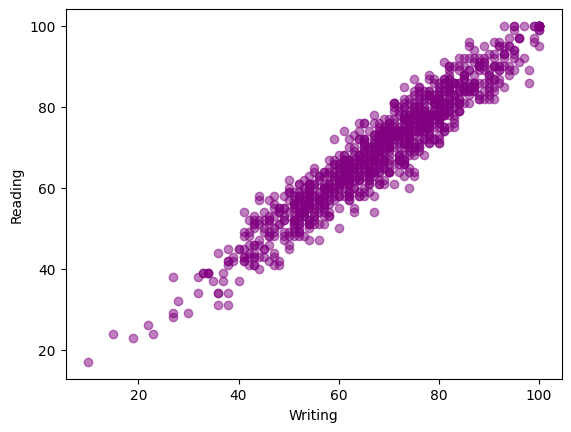

In [20]:
#correlation between reading_score and writing_score

plt.scatter(df['writing_score'], df['reading_score'], color = 'purple', alpha = 0.5)

plt.xlabel('Writing')
plt.ylabel('Reading')

plt.show()

The positive correlation indicates that the more one writes, the more he reads..